In [1]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **2020**

In [ ]:
#Cargar archivo csv desde seaborn
# load Excel file and select sheet
df = pd.read_excel('GastosCostos2023_adecuado.xlsx', sheet_name='2020')
#df2020.head(3)

In [ ]:
#df["IVA"]=df['IVA'].fillna(df['IVA'].mean())

In [ ]:
#Rellenamos nulos
df =df.fillna(method="bfill")
df =df.fillna(method="ffill")


## **Reemplazar valores**

In [ ]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(df['TIPO GASTO'])
unico

array(['ALIMENTOS', 'ARRENDAMIENTO FINANCIERO', 'ARRENDAMIENTO LOCAL',
       'ATENCION CLIENTES', 'CALIBRACIONES', 'CAPACITACION',
       'COMBUSTIBLE', 'COMISION BANCARIA', 'COMISION VENTA', 'COMPRAS',
       'DERECHOS', 'ENERGIA ELECTRICA', 'FLETES', 'GERENCIA ADMON',
       'GERENCIA VTAS', 'HONORARIOS ADMON', 'HONORARIOS CONTABLES',
       'HONORARIOS PM', 'HOSPEDAJE', 'IMSS/INFONAVIT', 'MAQUILAS GIC',
       'MAQUINARIA', 'MEDICOS', 'MENSAJERIA', 'MOBILIARIO',
       'MTTO COMPUTO', 'MTTO LOCAL', 'MTTO TRANSPORTE', 'NO DEDUCIBLE',
       'PAPELERIA', 'PAQUETERIA', 'PEAJES', 'PUBLICIDAD',
       'REPARACIONES ELECTRICAS', 'SEGUROS', 'SERV FUNERARIO ',
       'SUBCONTRATOS', 'SUSCRIPCIONES', 'TELEFONO', 'TRANSPORTE',
       'UNIFORME', 'VALES DESPENSA'], dtype=object)

In [ ]:
#Convierto una variable a dicotómica 
df['TIPO GASTO']= df['TIPO GASTO'].replace(['ALIMENTOS', 'ARRENDAMIENTO FINANCIERO', 'ARRENDAMIENTO LOCAL',
       'ATENCION CLIENTES', 'CALIBRACIONES', 'CAPACITACION',
       'COMBUSTIBLE', 'COMISION BANCARIA', 'COMISION VENTA',
       'DERECHOS', 'ENERGIA ELECTRICA', 'FLETES', 'GERENCIA ADMON',
       'GERENCIA VTAS', 'HONORARIOS ADMON', 'HONORARIOS CONTABLES',
       'HONORARIOS PM', 'HOSPEDAJE', 'IMSS/INFONAVIT', 'MAQUILAS GIC',
       'MAQUINARIA', 'MEDICOS', 'MENSAJERIA', 'MOBILIARIO',
       'MTTO COMPUTO', 'MTTO LOCAL', 'MTTO TRANSPORTE', 'NO DEDUCIBLE',
       'PAPELERIA', 'PAQUETERIA', 'PEAJES', 'PUBLICIDAD',
       'REPARACIONES ELECTRICAS', 'SEGUROS', 'SERV FUNERARIO ',
       'SUBCONTRATOS', 'SUSCRIPCIONES', 'TELEFONO', 'TRANSPORTE',
       'UNIFORME', 'VALES DESPENSA'], "OTROS GASTOS")
#df

In [ ]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(df['TIPO GASTO'])
unico

array(['COMPRAS', 'OTROS GASTOS'], dtype=object)

In [ ]:
df['TIPO GASTO'].value_counts()

OTROS GASTOS    1871
COMPRAS         1471
Name: TIPO GASTO, dtype: int64

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['TOTAL MX']]
Var_Dep= df['TIPO GASTO']

In [ ]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =68)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', ...,
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  0 455]
 [  0 548]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="weighted", pos_label="COMPRAS")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.2985102518963548


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'COMPRAS') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5463609172482552


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="weighted", pos_label="COMPRAS")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.5463609172482552


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'COMPRAS') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="weighted", pos_label="COMPRAS")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.38608095764286765


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'COMPRAS') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# **2021**

### **Preparación**

In [2]:
df2021 = pd.read_excel('GastosCostos2023_adecuado.xlsx', sheet_name='2021')

In [3]:
#Rellenamos nulos
df2021 =df2021.fillna(method="bfill")
df2021 =df2021.fillna(method="ffill")

Convertir la variable TIPO GASTO en una variable dicotómica con los valores: “COMPRAS” y “OTROS GASTOS”

In [4]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(df2021['TIPO GASTO'])
unico

array(['ALIMENTOS', 'ARRENDAMIENTO FINANCIERO', 'ARRENDAMIENTO LOCAL',
       'BOTIQUIN', 'CALIBRACIONES', 'CAPACITACION', 'COMBUSTIBLE ',
       'COMISION BANCARIA', 'COMISION MIXTA', 'COMPRA COMPUTADORA ',
       'COMPRA TABLET ', 'COMPRAS', 'COMPRAS ', 'DERECHOS',
       'ENERGIA ELECTRICA', 'FLETE', 'FLETES', 'GASOLINA',
       'GASTOS IMPORTACION ', 'GERENCIA ADMON', 'GERENCIA VTAS',
       'HONORARIOS CONTABLES', 'HONORARIOS JURIDICOS', 'HONORARIOS PF',
       'HONORARIOS PM', 'HOSPEDAJE', 'HOSPEDAJE ', 'IMSS/INFONAVIT',
       'MAQUILAS', 'MAQUILAS GIC', 'MAQUINARIA', 'MEDICOS', 'MENSAJERIA',
       'MONITOREO CAMARAS ADT', 'MTTO COMPUTO', 'MTTO LOCAL',
       'MTTO MAQUINARIA', 'MTTO OFICINA ', 'MTTO TRANSPORTE',
       'NO DEDUCIBLE', 'PAPELERIA', 'PAQUETERIA', 'PEAJES', 'PUBLICIDAD',
       'RENTA COPIADORA', 'RENTA OFICINA ', 'SANITIZACION', 'SEGUROS',
       'SUELDOS DIRECCION', 'SUELDOS PRODUCCION', 'SUELDOS VENTAS',
       'SUSCRIPCIONES', 'TELEFONO', 'TRANSPORTE', 'UNIFO

In [5]:
#Convierto una variable a dicotómica 

df2021['TIPO GASTO']= df2021['TIPO GASTO'].replace(['COMPRAS '],"COMPRAS")
df2021['TIPO GASTO']= df2021['TIPO GASTO'].replace(['ALIMENTOS', 'ARRENDAMIENTO FINANCIERO', 'ARRENDAMIENTO LOCAL',
       'BOTIQUIN', 'CALIBRACIONES', 'CAPACITACION', 'COMBUSTIBLE ',
       'COMISION BANCARIA', 'COMISION MIXTA', 'COMPRA COMPUTADORA ',
       'COMPRA TABLET ', 'DERECHOS',
       'ENERGIA ELECTRICA', 'FLETE', 'FLETES', 'GASOLINA',
       'GASTOS IMPORTACION ', 'GERENCIA ADMON', 'GERENCIA VTAS',
       'HONORARIOS CONTABLES', 'HONORARIOS JURIDICOS', 'HONORARIOS PF',
       'HONORARIOS PM', 'HOSPEDAJE', 'HOSPEDAJE ', 'IMSS/INFONAVIT',
       'MAQUILAS', 'MAQUILAS GIC', 'MAQUINARIA', 'MEDICOS', 'MENSAJERIA',
       'MONITOREO CAMARAS ADT', 'MTTO COMPUTO', 'MTTO LOCAL',
       'MTTO MAQUINARIA', 'MTTO OFICINA ', 'MTTO TRANSPORTE',
       'NO DEDUCIBLE', 'PAPELERIA', 'PAQUETERIA', 'PEAJES', 'PUBLICIDAD',
       'RENTA COPIADORA', 'RENTA OFICINA ', 'SANITIZACION', 'SEGUROS',
       'SUELDOS DIRECCION', 'SUELDOS PRODUCCION', 'SUELDOS VENTAS',
       'SUSCRIPCIONES', 'TELEFONO', 'TRANSPORTE', 'UNIFORME',
       'VALES DESPENSA'], "OTROS GASTOS")
df2021

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",OTROS GASTOS,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",OTROS GASTOS,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.20,400.20,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,OTROS GASTOS,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,OTROS GASTOS,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",OTROS GASTOS,Pago,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,PD02-DIC21
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,PD02-DIC21
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,OTROS GASTOS,SERVICIOS BANCARIOS,PUE,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04,I,Vigente,PD02-DIC21
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",OTROS GASTOS,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,PD02-DIC21


In [6]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(df2021['TIPO GASTO'])
unico

array(['COMPRAS', 'OTROS GASTOS'], dtype=object)

In [19]:
df2021["TIPO GASTO"].value_counts()

COMPRAS         1531
OTROS GASTOS    1504
Name: TIPO GASTO, dtype: int64

### **Análisis**

In [20]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df2021[['TOTAL MX']]
Var_Dep= df2021['TIPO GASTO']

In [21]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [22]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [23]:
#Se escalan todos los datos
escalar = StandardScaler()

In [24]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [25]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [26]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [27]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['COMPRAS', 'OTROS GASTOS', 'OTROS GASTOS', 'COMPRAS', 'COMPRAS',
       'OTROS GASTOS', 'COMPRAS', 'COMPRAS', 'OTROS GASTOS', 'COMPRAS',
       'COMPRAS', 'OTROS GASTOS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'OTROS GASTOS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'OTROS GASTOS',
       'COMPRAS', 'OTROS GASTOS', 'COMPRAS', 'OTROS GASTOS',
       'OTROS GASTOS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'COMPRAS', 'COMPRAS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'COMPRAS',
       'OTROS GASTOS', 'COMPRAS', 'OTROS GASTOS', 'COMPRAS',
       'OTROS GASTOS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'OTROS GASTOS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'OTROS GASTOS', 'COMPRAS', 'OTROS GASTOS', 'COMPRAS',
       'OTROS GASTOS', 'OTROS GASTOS', 'COMP

In [28]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[365 101]
 [346  99]]


In [30]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="COMPRAS")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5133614627285513


In [31]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5093304061470911


In [33]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="COMPRAS")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.7832618025751072


In [35]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="COMPRAS")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.6202209005947324


# **2022**

In [ ]:
#Cargar archivo csv desde seaborn
df_2022= pd.read_excel("GastosCostos2023_adecuado.xlsx", sheet_name="2022")
df_2022

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,I,Vigente,NaN
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,17310.30,516.32,0.0,0.0,NaN,17826.62,17826.62,I,Vigente,NaN
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN


In [ ]:
df_2022['IVA'].fillna(df_2022['IVA'].mean(), inplace=True)

In [ ]:
#Convierto una variable a dicotómica 
df_2022['TIPO GASTO'].replace('COMPRAS ','COMPRAS', inplace=True)
import numpy as np

df_2022['TIPO GASTO'] = np.where(df_2022['TIPO GASTO'].isin(['COMPRAS']), df_2022['TIPO GASTO'], 'OTROS GASTOS')
df_2022['TIPO GASTO'].value_counts()

OTROS GASTOS    1363
COMPRAS         1214
Name: TIPO GASTO, dtype: int64

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_2022[['TOTAL MX']]
Var_Dep= df_2022['TIPO GASTO']

In [ ]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =68)#63 68 70

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
       'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS', 'OTROS GASTOS',
      

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  1 360]
 [  3 410]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="COMPRAS")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.25


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5310077519379846


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="COMPRAS")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.002770083102493075


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="COMPRAS")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.0054794520547945215


# **2023**

In [ ]:
df23 = pd.read_excel('GastosCostos2023_adecuado.xlsx', sheet_name='2023')
df23.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


## Converción de variable TIPO GASTO

In [ ]:
#Rellenamos nulos
df23 =df23.fillna(method="bfill")
df23 =df23.fillna(method="ffill")

In [ ]:
unico = np.unique(df23['TIPO GASTO'])
unico

array(['ALIMENTOS', 'ARRENDAMIENTO FINANCIERO', 'CAPACITACION',
       'COMISION BANCARIA', 'COMISION MIXTA', 'COMPRAS', 'COMPRAS ',
       'CREDITO ', 'DERECHOS', 'FLETES', 'GASOLINA', 'GERENCIA ADMON',
       'HONORARIOS CONTABLES', 'HONORARIOS PM', 'IMSS/INFONAVIT',
       'MAQUINARIA', 'MENSAJERIA', 'MONITOREO CAMARAS ADT', 'MTT OFICINA',
       'MTTO COMPUTO', 'MTTO LOCAL', 'MTTO MAQUINARIA', 'MTTO OFICINA ',
       'MTTO TRANSPORTE', 'NO DEDUCIBLE', 'PAPELERIA', 'PAQUETERIA',
       'PUBLICIDAD', 'RENTA AUTO', 'RENTA COPIADORA', 'SEGUROS',
       'SUELDOS DIRECCION', 'SUSCRIPCIONES', 'TELEFONO', 'UNIFORMES',
       'VALES DESPENSA', 'VARIOS'], dtype=object)

In [ ]:
df23['TIPO GASTO']= df23['TIPO GASTO'].replace(['COMPRAS '],"COMPRAS")
df23['TIPO GASTO']= df23['TIPO GASTO'].replace(['ALIMENTOS', 'ARRENDAMIENTO FINANCIERO', 'CAPACITACION',
       'COMISION BANCARIA', 'COMISION MIXTA', 'COMPRAS ',
       'CREDITO ', 'DERECHOS', 'FLETES', 'GASOLINA', 'GERENCIA ADMON',
       'HONORARIOS CONTABLES', 'HONORARIOS PM', 'IMSS/INFONAVIT',
       'MAQUINARIA', 'MENSAJERIA', 'MONITOREO CAMARAS ADT', 'MTT OFICINA',
       'MTTO COMPUTO', 'MTTO LOCAL', 'MTTO MAQUINARIA', 'MTTO OFICINA ',
       'MTTO TRANSPORTE', 'NO DEDUCIBLE', 'PAPELERIA', 'PAQUETERIA',
       'PUBLICIDAD', 'RENTA AUTO', 'RENTA COPIADORA', 'SEGUROS',
       'SUELDOS DIRECCION', 'SUSCRIPCIONES', 'TELEFONO', 'UNIFORMES',
       'VALES DESPENSA', 'VARIOS'], "OTROS GASTOS")
df23

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,99.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,PE01-ENE23
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,99.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,PE01-ENE23
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,OTROS GASTOS,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,OTROS GASTOS,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,OTROS GASTOS,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",OTROS GASTOS,COMISIONES E INTERESES,PUE,3.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,I,Vigente,PE111-FEB23
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,OTROS GASTOS,Epura 20 Lts Policarbonato,PUE,1.0,1.0,220.00,0.00,0.0,0.0,NaN,220.00,220.00,I,Vigente,PE111-FEB23
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,OTROS GASTOS,SERVICIOS BANCARIOS,PUE,3.0,1.0,18071.52,682.40,0.0,0.0,NaN,18753.92,18753.92,I,Vigente,PE111-FEB23
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,OTROS GASTOS,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,1.0,14472.32,0.00,0.0,0.0,NaN,14472.32,14472.32,I,Vigente,PE111-FEB23


In [ ]:
df23['TIPO GASTO'].value_counts()

COMPRAS         210
OTROS GASTOS    187
Name: TIPO GASTO, dtype: int64

## **Regresión Logística**

In [ ]:
X= df23[['TOTAL MX']]
y= df23['TIPO GASTO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =12)

In [ ]:
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test) 
y_pred

array(['OTROS GASTOS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'OTROS GASTOS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'OTROS GASTOS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'OTROS GASTOS', 'OTROS GASTOS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'OTROS GASTOS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'COMPRAS', 'OTROS GASTOS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'OTROS GASTOS', 'COMPRAS',
       'COMPRAS', 'COMPRAS', 'COMPRAS', 'OTROS GASTOS', 'COMPRAS',
       'COMPRAS', 'CO

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[58  7]
 [49  6]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="COMPRAS")
print('Precisión del modelo:', precision)
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:', exactitud)
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="COMPRAS")
print('Sensibilidad del modelo:', sensibilidad)

Precisión del modelo: 0.5420560747663551
Exactitud del modelo: 0.5333333333333333
Sensibilidad del modelo: 0.8923076923076924


# **Tabla comparativa e Interpretación**

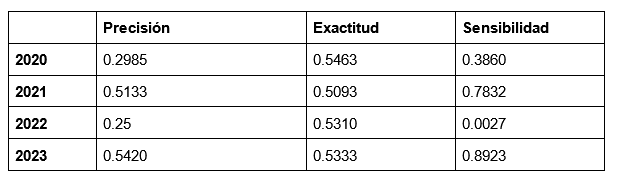

El modelo con mayor porcentaje de precisión fue el realizado con el año 2023. Esto puede exliarse debido a que es el que tiene menor cantidad de registros, lo que favorece la precisión debido a que indica el porcentaje de casos correctamente clasificados sobre el total de casos.

- 2020: 0.2985 (29.85%)
- 2021: 0.5133 (51.33%)
- 2022: 0.25 (25.00%)
- 2023: 0.5420 (54.20%)

En cuanto a la excatitud, esta mide la proporción de casos positivos predichos correctamente en relación con el total de casos positivos predichos (tanto verdaderos como falsos positivos). La más alta fue en 2020. 

- 2020: 0.5463 (54.63%)
- 2021: 0.5093 (50.93%)
- 2022: 0.5310 (53.10%)
- 2023: 0.5333 (53.33%)

Entorno a la sensibilidad, la más alta se obtuvo en el año 2023 y esta proporciona los verdaderos casos positivos que son correctamente identificados en relación con el total de casos positivos reales. 

- 2020: 0.3860 (38.60%)
- 2021: 0.7832 (78.32%)
- 2022: 0.0027 (0.27%)
- 2023: 0.8923 (89.23%)